# Project Descreption

The Objective of this project is :

1.   Use the OpenFoodFact   that shows  characteristics of certain product groups, similarities between products and product groups, to provide a global view of the dataset, and exhibit salient features that are of interest for an analyst or stakeholder in this sector.

2.   Use some machine learning algorithms to : 

        *   predict the **nutriscore_grade** of a product given nutritional values and possibly other fields (as few as possible)
        *   predict the **nova_group** of a product given nutritional values and possibly other fields (as few as possible),
        *   predict the **pnns_groups_1** of a product given nutritional values and possibly other fields (as few as possible),
        *   predict the **pnns_groups_2** of a product given nutritional values and possibly other fields (as few as possible),
        *   predict the **categories** (either atomic categories or lists of categories) of a product given nutritional values and possibly other fields (as few as possible),
        *   predict one or more **nutritional values** (ex: sugars_100g) given nutritional values and possibly other fields (as few as possible)
        






# Importing the Libraries

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
import numpy as np
import seaborn as sns
from sklearn.preprocessing import  StandardScaler,  LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import statsmodels.api as sm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Importing the dataset

In [4]:
data = pd.read_csv('C:/Users/DELL/Desktop/off_complete.csv', sep = '\t', nrows = 10000)

In [5]:
data.shape

(10000, 29)

In [6]:
data.head()

,code,url,product_name,brands,categories,countries_tags,additives_tags,nutriscore_score,nutriscore_grade,nova_group,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,0000000020114,http://world-fr.openfoodfacts.org/produit/0000...,Naturablue original,Natura4Ever,Compléments alimentaires,en:france,en:e422,NaN,NaN,4.0,...,0.0,NaN,0.00,NaN,NaN,NaN,0.08000,NaN,NaN,NaN
1,0000000290616,http://world-fr.openfoodfacts.org/produit/0000...,Salade Cesar,Kirkland Signature,"Aliments et boissons à base de végétaux, Alime...",en:canada,"en:e341,en:e341i,en:e415,en:e517",6.0,c,4.0,...,0.0,2.00,22.00,2.160,0.864,0.000000,0.00000,0.0000,0.00000,6.0
2,0000000394710,http://world-fr.openfoodfacts.org/produit/0000...,Danoises à la cannelle roulées,Kirkland Signature,"Snacks, Snacks sucrés, Biscuits et gâteaux, Pâ...",en:canada,"en:e1100,en:e202,en:e203,en:e330,en:e406,en:e4...",NaN,NaN,4.0,...,28.1,2.05,4.79,0.922,0.369,0.000205,0.00616,0.0548,0.00247,NaN
3,0000000491228,http://world-fr.openfoodfacts.org/produit/0000...,Entremets Crème Brulée,Comme j'aime,"Produits laitiers, Desserts, Produits déshydra...",en:france,"en:e102,en:e110,en:e407,en:e471",2.0,b,4.0,...,69.8,0.10,6.80,0.500,0.200,NaN,NaN,NaN,NaN,2.0
4,0000001938067,http://world-fr.openfoodfacts.org/produit/0000...,Chaussons tressés aux pommes,Kirkland Signature,"Snacks, Snacks sucrés, Biscuits et gâteaux, Vi...",en:canada,"en:e202,en:e211,en:e330",9.0,c,4.0,...,24.7,2.00,3.33,0.647,0.259,0.000000,0.00160,0.0133,0.00048,9.0


# Data Preprocessing

In [7]:
data.drop(['salt_100g'], 1, inplace=True)
data.drop(['nutrition-score-fr_100g'], 1, inplace=True)                         

In [8]:
data.shape

(10000, 27)

In [9]:
data.columns

Index(['code', 'url', 'product_name', 'brands', 'categories', 'countries_tags',
       'additives_tags', 'nutriscore_score', 'nutriscore_grade', 'nova_group',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'energy-kcal_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                10000 non-null  object 
 1   url                 10000 non-null  object 
 2   product_name        10000 non-null  object 
 3   brands              10000 non-null  object 
 4   categories          10000 non-null  object 
 5   countries_tags      9957 non-null   object 
 6   additives_tags      5467 non-null   object 
 7   nutriscore_score    7727 non-null   float64
 8   nutriscore_grade    7727 non-null   object 
 9   nova_group          8997 non-null   float64
 10  pnns_groups_1       9737 non-null   object 
 11  pnns_groups_2       10000 non-null  object 
 12  states              10000 non-null  object 
 13  energy-kcal_100g    6248 non-null   float64
 14  fat_100g            8479 non-null   float64
 15  saturated-fat_100g  8217 non-null   float64
 16  trans

**Note**

While the code of products refers to manufacturer-specific coding with tariff indication, The country or the company markets the product, The manufacturer, the Article code and a control key, so we can drop the  product code , because we already have the country that markets the product.

In [11]:
data.drop(['code'], 1, inplace=True)

In [12]:
data['url'].values

array(['http://world-fr.openfoodfacts.org/produit/0000000020114/naturablue-original-natura4ever',
       'http://world-fr.openfoodfacts.org/produit/0000000290616/salade-cesar-kirkland-signature',
       'http://world-fr.openfoodfacts.org/produit/0000000394710/danoises-a-la-cannelle-roulees-kirkland-signature',
       ...,
       'http://world-fr.openfoodfacts.org/produit/20426255/baguette-cereales-a-finir-de-cuire-maitre-jean-pierre',
       'http://world-fr.openfoodfacts.org/produit/20426262/baguette-a-finir-de-cuire-maitre-jean-pierre',
       'http://world-fr.openfoodfacts.org/produit/20426279/4-petits-pains-a-finir-de-cuire-maitre-jean-pierre'],
      dtype=object)

**Note :**

We see that in every url of the products, it contains the product name and the brand, so we can drop this feature

In [13]:
data.drop(['url'], 1, inplace=True)

I will Try to find the pourcentage of the null values in every features, and drop the features with more than 70% of null values.

In [14]:
for i in data.columns:
    h = (data[i].isnull().sum()/len(data['product_name']))*100
    print('The pourcentage of the null values of '+i+' is : ', h, '%')


The pourcentage of the null values of product_name is :  0.0 %
The pourcentage of the null values of brands is :  0.0 %
The pourcentage of the null values of categories is :  0.0 %
The pourcentage of the null values of countries_tags is :  0.43 %
The pourcentage of the null values of additives_tags is :  45.33 %
The pourcentage of the null values of nutriscore_score is :  22.73 %
The pourcentage of the null values of nutriscore_grade is :  22.73 %
The pourcentage of the null values of nova_group is :  10.03 %
The pourcentage of the null values of pnns_groups_1 is :  2.63 %
The pourcentage of the null values of pnns_groups_2 is :  0.0 %
The pourcentage of the null values of states is :  0.0 %
The pourcentage of the null values of energy-kcal_100g is :  37.519999999999996 %
The pourcentage of the null values of fat_100g is :  15.21 %
The pourcentage of the null values of saturated-fat_100g is :  17.83 %
The pourcentage of the null values of trans-fat_100g is :  85.72999999999999 %
The po

In [15]:
data.drop(['trans-fat_100g'], 1, inplace=True)
data.drop(['cholesterol_100g'], 1, inplace=True)
data.drop(['vitamin-a_100g'], 1, inplace=True)
data.drop(['vitamin-c_100g'], 1, inplace=True)
data.drop(['calcium_100g'], 1, inplace=True)
data.drop(['iron_100g'], 1, inplace=True)

I will Pick up the countries_tags with highest number of products 


In [16]:
data['countries_tags'].value_counts().head(17)

en:france                      3287
en:united-states               1232
en:germany                      629
en:canada                       577
en:united-kingdom               558
en:mexico                       490
en:france,en:united-kingdom     357
en:spain                        354
en:france,en:germany            274
en:france,en:united-states      255
en:canada,en:france             121
en:belgium,en:france             94
en:france,en:spain               76
en:belgium                       71
en:france,en:switzerland         55
en:poland                        51
en:austria,en:germany            48
Name: countries_tags, dtype: int64

In [17]:
data['countries_tags']=data['countries_tags'].fillna('Unknown')

In [18]:
countries_tags_values = data['countries_tags'].values
most_countries = ('en:france' , 'en:germany',  'en:spain' , 'en:mexico', 'en:united-kingdom' ,'en:canada', 'en:united-states', 'en:belgium','en:switzerland',  'en:poland')
countrie= {'en:france' : [], 'en:germany': [],  'en:spain': [] , 'en:mexico': [], 'en:united-kingdom': [], 'en:canada': [], 'en:united-states': [], 'en:belgium': [],
           'en:switzerland': [],'en:poland': []} 
for i in countries_tags_values : 
   for j in most_countries:
       if j in str(i):
         countrie[j].append(1)
       else : 
          countrie[j].append(0)


In [19]:
for i in most_countries:
  data[i] = pd.DataFrame(countrie[i])

In [20]:
data.drop(['countries_tags'], 1, inplace=True)

I will work on the Product Name Feature

In [21]:
product_names_list = data['product_name'].values
list_products = []
for i in product_names_list:
  i = i.replace('Le', '')
  i = i.replace('La', '')
  i = i.replace('2', '')
  first_word = i.split()[0]
  list_products.append(first_word)
data['product_name'] = pd.DataFrame(list_products)

In [22]:
data['product_name'].value_counts().head(10)

Organic      102
Pain          72
Chocolate     62
Sauce         55
Salade        51
Crème         43
Original      42
Jambon        42
Bio           41
Jus           41
Name: product_name, dtype: int64

In [23]:
product_name__values = data['product_name'].values
most_products = ('Organic' , 'Pain',  'Chocolate' , 'Filet', 'Sauce' ,'Salade', 'Crème', 'Jambon','Original', 'Bio', 'Jus')
products= {'Organic':[] , 'Pain':[],  'Chocolate':[] , 'Filet':[], 'Sauce':[] ,'Salade':[], 'Crème':[], 'Jambon':[],'Original':[], 'Bio':[], 'Jus':[]} 
for i in product_name__values : 
   for j in most_products:
       if j in str(i):
         products[j].append(1)
       else : 
          products[j].append(0)
for i in most_products:
  data[i] = pd.DataFrame(products[i])
data.drop(['product_name'], 1, inplace=True) 


In [24]:
data.drop(['brands'], 1, inplace=True)

In [25]:
categories_list = data['categories'].values
list_categories = []
for i in categories_list:
  first_word = i.split()[0]
  first_word = first_word.replace(',', '')
  list_categories.append(first_word)
data['categories'] = pd.DataFrame(list_categories)


In [26]:
data['categories'].unique().shape

(762,)

In [27]:
data['categories'].value_counts().head(11)

Snacks         1284
Aliments       1282
Plant-based    1023
Produits        535
Alimentos       500
Viandes         472
Boissons        329
Pflanzliche     299
Plats           256
Groceries       234
Dairies         212
Name: categories, dtype: int64

In [28]:
categories__values = data['categories'].values
most_categories = ('Snacks' , 'Aliments',  'Plant-based' , 'Produits', 'Alimentos' ,'Viandes', 'Boissons', 'Pflanzliche','Plats', 'Groceries', 'Dairies')
categories= {'Snacks':[] , 'Aliments':[],  'Plant-based':[] , 'Produits':[], 'Alimentos':[] ,'Viandes':[], 'Boissons':[], 'Pflanzliche':[],'Plats':[], 'Groceries':[], 'Dairies':[]} 
for i in categories__values : 
   for j in most_categories:
       if j in str(i):
         categories[j].append(1)
       else : 
          categories[j].append(0)
for i in most_categories:
  data[i] = pd.DataFrame(categories[i])
data.drop(['categories'], 1, inplace=True)
data['Aliments'] = data['Aliments']+ data['Alimentos']
aliments_values = data['Aliments'].values
for i in range(len(aliments_values)):
  if aliments_values[i]==2:
        aliments_values[i] = 1
data['Aliments'] = pd.DataFrame(aliments_values)
data.drop(['Alimentos'], 1, inplace=True)

In [29]:
data.drop(['additives_tags','states'], 1, inplace=True)

In [30]:
data['nutriscore_grade'].fillna('None', inplace = True)

In [31]:
def function_escalier(x):
  if x >=0:
      return(int(x+0.5))
  else:
    return int(x)

In [32]:
data['nutriscore_score'] = data['nutriscore_score'].astype(float)
data_grouped = data.groupby('pnns_groups_2')['nutriscore_score'].mean()
grades = list(data['pnns_groups_2'].unique())
for grade in grades:
  p = data['pnns_groups_2'] == grade
  data.loc[p, 'nutriscore_score'] = data.loc[p, 'nutriscore_score'].fillna(function_escalier(data_grouped[grade]))

In [33]:
df =pd.get_dummies(data['nova_group'])
for i in df.columns[:-1] : 
         data['nova_group'+str(i)] = df[i]
data.drop(['nova_group'], 1, inplace=True)

In [34]:
dh = data.groupby(['pnns_groups_1'])['pnns_groups_2'].value_counts()

In [35]:
dh = list(dict(dh))
dh

[('Beverages', 'Sweetened beverages'),
 ('Beverages', 'Fruit juices'),
 ('Beverages', 'Artificially sweetened beverages'),
 ('Beverages', 'Plant-based milk substitutes'),
 ('Beverages', 'Waters and flavored waters'),
 ('Beverages', 'Unsweetened beverages'),
 ('Beverages', 'Fruit nectars'),
 ('Beverages', 'Teas and herbal teas and coffees'),
 ('Cereals and potatoes', 'Cereals'),
 ('Cereals and potatoes', 'Bread'),
 ('Cereals and potatoes', 'Breakfast cereals'),
 ('Cereals and potatoes', 'Legumes'),
 ('Cereals and potatoes', 'Potatoes'),
 ('Composite foods', 'One-dish meals'),
 ('Composite foods', 'Sandwiches'),
 ('Composite foods', 'Pizza pies and quiche'),
 ('Fat and sauces', 'Dressings and sauces'),
 ('Fat and sauces', 'Fats'),
 ('Fish Meat Eggs', 'Meat'),
 ('Fish Meat Eggs', 'Processed meat'),
 ('Fish Meat Eggs', 'Fish and seafood'),
 ('Fish Meat Eggs', 'Eggs'),
 ('Fish Meat Eggs', 'Offals'),
 ('Fruits and vegetables', 'Vegetables'),
 ('Fruits and vegetables', 'Fruits'),
 ('Fruits an

In [36]:
data['pnns_groups_1'].fillna('To Replace', inplace = True)
d = data[data['pnns_groups_1'] =='To Replace']['pnns_groups_2']
d.unique()

array(['Alcoholic beverages', 'Pizza pies and quiches'], dtype=object)

In [37]:
new_data = data[['pnns_groups_1','pnns_groups_2']].values
a_list1 = []
a_list2 = []
for i in range(len(new_data)):
     if new_data[i][1]=='Alcoholic beverages':
        new_data[i][0] ='Beverages'
     if new_data[i][1]=='Pizza pies and quiches':
        new_data[i][0] ='Composite foods'
df= pd.DataFrame(new_data, columns = ['pnns_groups_1','pnns_groups_2'])
data['pnns_groups_1'] = df['pnns_groups_1'] 
data['pnns_groups_2'] = df['pnns_groups_2'] 

In [38]:
lists= ['energy-kcal_100g','fat_100g', 'saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','sodium_100g']
for feature in lists:
    data[feature] = data[feature].astype(float)
    data_grouped = data.groupby('pnns_groups_2')[feature].mean()
    list_feature = list(data['pnns_groups_2'].unique())
    for value_f in list_feature:
         p = data['pnns_groups_2'] == value_f
         data.loc[p, feature] = data.loc[p, feature].fillna(data_grouped[value_f])

In [39]:
data['fat_100g'] = data['fat_100g'].astype(float)
data_grouped = data.groupby('pnns_groups_2')['fat_100g'].mean()
grades = list(data['pnns_groups_2'].unique())
for grade in grades:
  p = data['pnns_groups_2'] == grade
  data.loc[p, 'fat_100g'] = data.loc[p, 'fat_100g'].fillna(function_escalier(data_grouped[grade]))

In [40]:
df =pd.get_dummies(data['nutriscore_grade'], drop_first=True)
for i in df.columns : 
         data['nutriscore_grade_'+i] = df[i]

In [41]:
data.head()

,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,...,Groceries,Dairies,nova_group1.0,nova_group2.0,nova_group3.0,nutriscore_grade_a,nutriscore_grade_b,nutriscore_grade_c,nutriscore_grade_d,nutriscore_grade_e
0,9.0,None,unknown,unknown,0.000000,0.0,0.000000,0.0,0.0,3.642324,...,0,0,0,0,0,0,0,0,0,0
1,6.0,c,Fruits and vegetables,Vegetables,290.000000,12.0,7.000000,23.0,0.0,2.000000,...,0,0,0,0,0,0,0,1,0,0
2,18.0,None,Sugary snacks,Biscuits and cakes,363.000000,14.4,9.155663,54.1,28.1,2.050000,...,0,0,0,0,0,0,0,0,0,0
3,2.0,b,Milk and dairy products,Dairy desserts,169.272414,15.3,11.200000,75.5,69.8,0.100000,...,0,0,0,0,0,0,1,0,0,0
4,9.0,c,sugary-snacks,pastries,260.000000,10.7,2.000000,38.7,24.7,2.000000,...,0,0,0,0,0,0,0,1,0,0


In [42]:
data.isnull().sum()

nutriscore_score      0
nutriscore_grade      0
pnns_groups_1         0
pnns_groups_2         0
energy-kcal_100g      0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
sodium_100g           0
en:france             0
en:germany            0
en:spain              0
en:mexico             0
en:united-kingdom     0
en:canada             0
en:united-states      0
en:belgium            0
en:switzerland        0
en:poland             0
Organic               0
Pain                  0
Chocolate             0
Filet                 0
Sauce                 0
Salade                0
Crème                 0
Jambon                0
Original              0
Bio                   0
Jus                   0
Snacks                0
Aliments              0
Plant-based           0
Produits              0
Viandes               0
Boissons              0
Pflanzliche           0
Plats                 0
Groceries       

In [43]:
data['pnns_groups_2'].unique()

array(['unknown', 'Vegetables', 'Biscuits and cakes', 'Dairy desserts',
       'pastries', 'Sweetened beverages', 'Pizza pies and quiche',
       'Fruits', 'Sweets', 'Alcoholic beverages', 'Dressings and sauces',
       'Cereals', 'Processed meat', 'Bread', 'One-dish meals',
       'Salty and fatty products', 'Sandwiches', 'Legumes',
       'Unsweetened beverages', 'Cheese', 'vegetables', 'Dried fruits',
       'Fish and seafood', 'Appetizers', 'Fruit juices', 'Soups', 'Meat',
       'Milk and yogurt', 'Fats', 'Chocolate products',
       'Plant-based milk substitutes', 'Offals', 'Nuts',
       'Waters and flavored waters', 'Eggs',
       'Artificially sweetened beverages', 'Breakfast cereals',
       'Teas and herbal teas and coffees', 'Ice cream', 'fruits',
       'Potatoes', 'Fruit nectars', 'Pizza pies and quiches', 'cereals'],
      dtype=object)

In [44]:
df =pd.get_dummies(data[['pnns_groups_2']], drop_first=True)
for i in df.columns : 
         data[i] = df[i]
data.drop(['pnns_groups_2'], 1, inplace=True)

In [45]:
df =pd.get_dummies(data[['pnns_groups_1']], drop_first=True)
for i in df.columns : 
         data[i] = df[i]
data.drop(['pnns_groups_1'], 1, inplace=True)

In [46]:
data['nutriscore_score'] = data['nutriscore_score'].astype(int)


In [47]:
data.drop(['nutriscore_grade'], 1, inplace=True)

In [48]:
data.head(15)

,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,en:france,...,pnns_groups_1_Fat and sauces,pnns_groups_1_Fish Meat Eggs,pnns_groups_1_Fruits and vegetables,pnns_groups_1_Milk and dairy products,pnns_groups_1_Salty snacks,pnns_groups_1_Sugary snacks,pnns_groups_1_cereals-and-potatoes,pnns_groups_1_fruits-and-vegetables,pnns_groups_1_sugary-snacks,pnns_groups_1_unknown
0,9,0.000000,0.000000,0.000000,0.000000,0.000000,3.642324,0.000000,2.077011,1,...,0,0,0,0,0,0,0,0,0,1
1,6,290.000000,12.000000,7.000000,23.000000,0.000000,2.000000,22.000000,0.864000,0,...,0,0,1,0,0,0,0,0,0,0
2,18,363.000000,14.400000,9.155663,54.100000,28.100000,2.050000,4.790000,0.369000,0,...,0,0,0,0,0,1,0,0,0,0
3,2,169.272414,15.300000,11.200000,75.500000,69.800000,0.100000,6.800000,0.200000,1,...,0,0,0,1,0,0,0,0,0,0
4,9,260.000000,10.700000,2.000000,38.700000,24.700000,2.000000,3.330000,0.259000,0,...,0,0,0,0,0,0,0,0,1,0
5,2,278.000000,1.110000,0.333000,53.300000,1.110000,2.220000,10.000000,0.610000,0,...,0,0,0,0,0,0,0,0,0,1
6,12,51.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.400000,1,...,0,0,0,0,0,0,0,0,0,0
7,18,433.310800,19.446346,9.155663,57.331311,28.653719,3.344314,6.710910,0.752540,1,...,0,0,0,0,0,1,0,0,0,0
8,2,114.000000,6.790000,2.860000,7.860000,0.714000,0.357000,5.360000,0.200000,0,...,0,0,0,0,0,0,0,0,0,0
9,1,377.000000,0.500000,0.100000,93.000000,66.000000,1.575918,1.500000,0.008000,1,...,0,0,1,0,0,0,0,0,0,0


In [49]:
features = data
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

,skew
sodium_100g,69.929272
Jambon,15.151319
Crème,15.151319
Jus,14.975886
Original,14.806308
Salade,13.895451
Sauce,13.131806
Chocolate,12.379679
Filet,12.186952
Bio,11.495329


**Some Statistics : Skewness**

**Handling The  Outliers**

In [50]:
tr = data
for y in tr.columns :
  factor = 4
  upper_lim = data[y].mean () + data[y].std () * factor
  lower_lim = data[y].mean () - data[y].std () * factor
  tr = data[(data[y] < upper_lim) & (data[y] > lower_lim)]


# Prediction of the nova_group

In [51]:
X = data.drop(['carbohydrates_100g'], 1)
y = data['carbohydrates_100g']

In [52]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 >99.94:
        overfit.append(i)

In [53]:
overfit = list(overfit)
overfit

['pnns_groups_2_cereals', 'pnns_groups_1_cereals-and-potatoes']

Let's drop these overfits from 'X' .  

In [54]:
X.drop(overfit,axis=1,inplace=True)

Spliting the datasets into the training set and the test set

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2)

Scaling the dataset

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now that the data is ready, we will try to apply the **Regularization** to the data set using to methods : 

*   The Ridge method.
*   The Lasso method.

In [57]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [58]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

Text(0, 0.5, 'rmse')

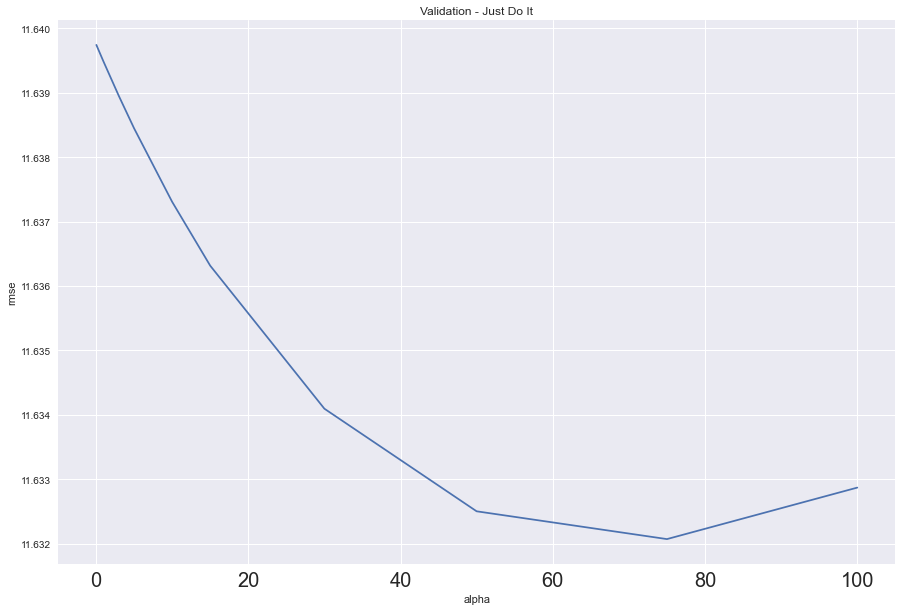

In [59]:
plt.rcParams['figure.figsize'] = (15, 10)
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.xticks(size = 20)
plt.ylabel("rmse")

In [60]:
cv_ridge

0.05      11.639741
0.10      11.639727
0.30      11.639671
1.00      11.639479
3.00      11.638949
5.00      11.638447
10.00     11.637306
15.00     11.636315
30.00     11.634095
50.00     11.632502
75.00     11.632071
100.00    11.632870
dtype: float64

**Note :** we can see that the value of alpha that gives the best values is 100.


In [61]:
cv_ridge.min()

11.632070987082432

In [62]:
model_ridge = Ridge(alpha=100)
model_ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [63]:
data1 = data
data1.drop(overfit,axis=1,inplace=True)
data1.drop(('carbohydrates_100g'), axis=1, inplace=True)

In [64]:
coef = pd.Series(model_ridge.coef_.ravel(), index = data1.columns)
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 100 variables and eliminated the other 0 variables


In [65]:
model_ridge.coef_.ravel()

array([ 1.95494848e+00,  8.14275789e+00, -6.47535762e+00, -1.18679340e+00,
        1.16430226e+01,  1.34374936e+00, -9.10400743e-01, -6.38912398e-02,
        1.39355827e-01,  2.21201578e-01, -1.75993445e-01,  6.75580385e-01,
       -5.40642295e-02,  7.04111885e-01,  1.20376192e+00, -2.82319508e-01,
        1.16774474e-01,  5.84896612e-03,  6.02990517e-02, -5.07517551e-03,
        1.44085722e-01, -1.30836118e-01, -3.02858452e-02, -2.51514752e-01,
        1.75664044e-01, -8.43134807e-02,  2.77717812e-02,  1.31136892e-01,
        5.87519124e-03,  2.50798864e+00, -1.83552990e-01, -2.18663109e-01,
       -3.89170284e-01, -2.68387773e-01,  9.30923156e-02, -3.03667004e-01,
       -3.80114759e-01, -5.13665218e-01, -3.41564604e-01,  1.58759486e-01,
        7.10280770e-02, -2.17951774e-01,  8.68521975e-02, -3.76183967e-01,
       -2.00229002e-01,  2.49354211e-01, -7.89732161e-02,  3.62695355e+00,
       -1.29177704e-01,  3.05288114e+00,  2.93341602e+00,  3.15997961e+00,
        4.49781723e+00, -

In [66]:
rid_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
rid_coef

fat_100g                                  -6.475358
saturated-fat_100g                        -1.186793
pnns_groups_2_Legumes                     -1.169899
pnns_groups_2_Salty and fatty products    -0.960410
proteins_100g                             -0.910401
pnns_groups_2_Chocolate products          -0.767647
Groceries                                 -0.513665
Produits                                  -0.389170
Plats                                     -0.380115
nutriscore_grade_b                        -0.376184
Snacks                                     2.507989
pnns_groups_1_Sugary snacks                2.661846
pnns_groups_2_Bread                        2.933416
pnns_groups_2_Biscuits and cakes           3.052881
pnns_groups_2_Breakfast cereals            3.159980
pnns_groups_2_Appetizers                   3.626954
pnns_groups_2_Cereals                      4.497817
pnns_groups_1_Cereals and potatoes         5.753658
energy-kcal_100g                           8.142758
sugars_100g 

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

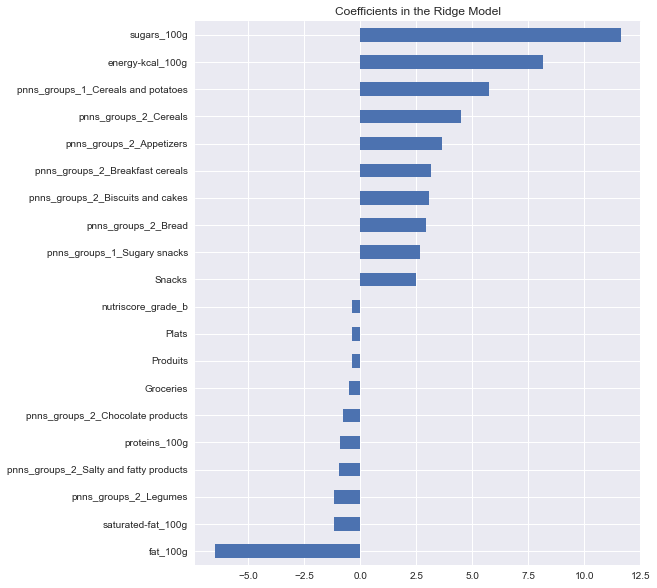

In [67]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
rid_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

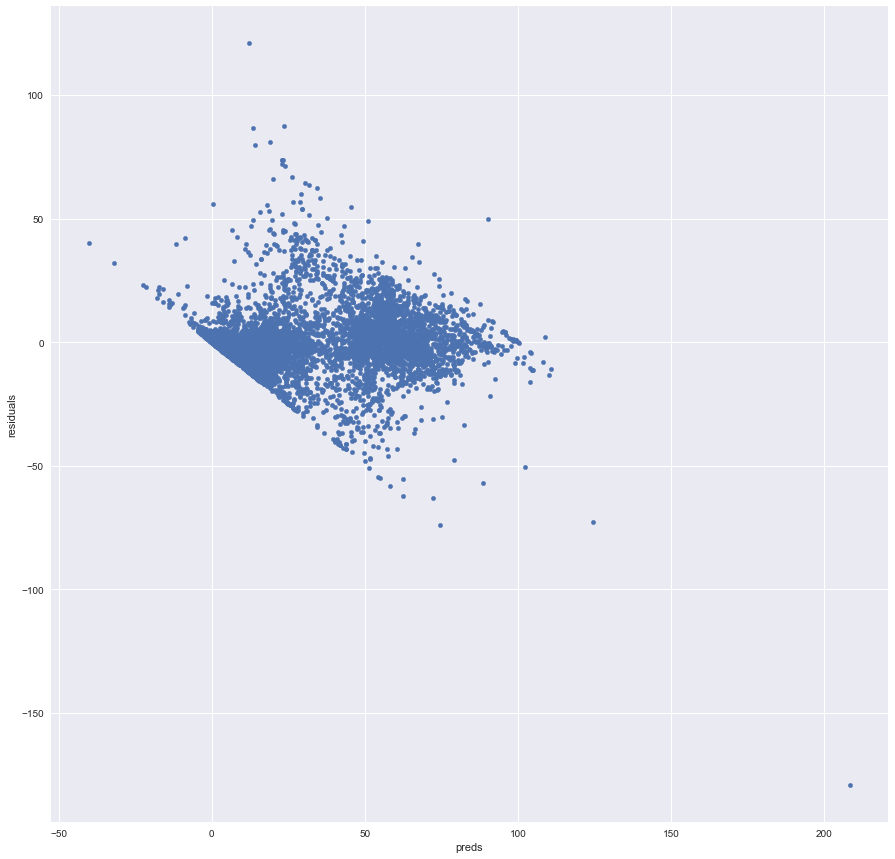

In [68]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (15, 15)

preds = pd.DataFrame({"preds":model_ridge.predict(X_train).ravel(), "true":y_train.ravel()})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

*The* Lasso Method

In [69]:
model_lasso = LassoCV(alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100]).fit(X_train, y_train.ravel())

In [70]:
rmse_cv(model_lasso).mean()

11.651099721904393

In [71]:
coef = pd.Series(model_lasso.coef_, index = data1.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 78 variables and eliminated the other 22 variables


In [72]:
imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
imp_coef

fat_100g                              -6.561605
pnns_groups_2_Legumes                 -2.771002
saturated-fat_100g                    -0.936234
pnns_groups_2_Chocolate products      -0.908405
proteins_100g                         -0.817936
pnns_groups_2_Potatoes                -0.655406
pnns_groups_2_Cheese                  -0.446663
pnns_groups_2_Processed meat          -0.380778
pnns_groups_1_Fish Meat Eggs          -0.374080
Groceries                             -0.368407
nutriscore_score                       1.431047
pnns_groups_1_unknown                  2.301841
pnns_groups_1_Sugary snacks            2.303112
pnns_groups_1_Composite foods          2.435163
Snacks                                 2.578096
pnns_groups_2_Biscuits and cakes       2.798930
pnns_groups_2_Appetizers               4.739788
energy-kcal_100g                       8.454019
pnns_groups_1_Cereals and potatoes    10.432124
sugars_100g                           12.131696
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

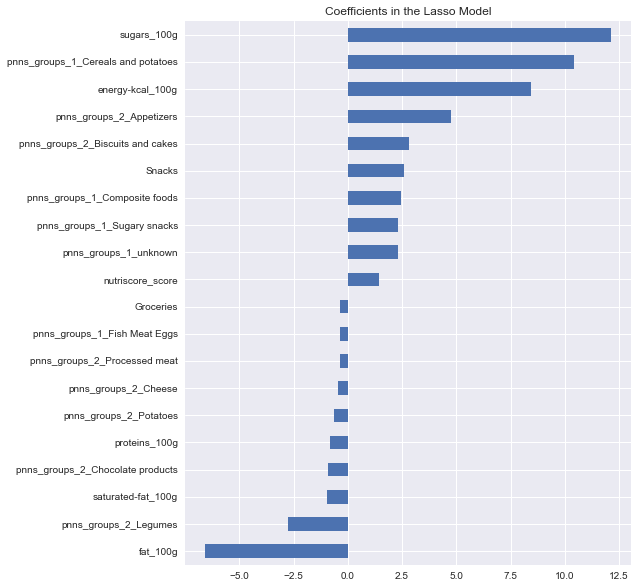

In [73]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

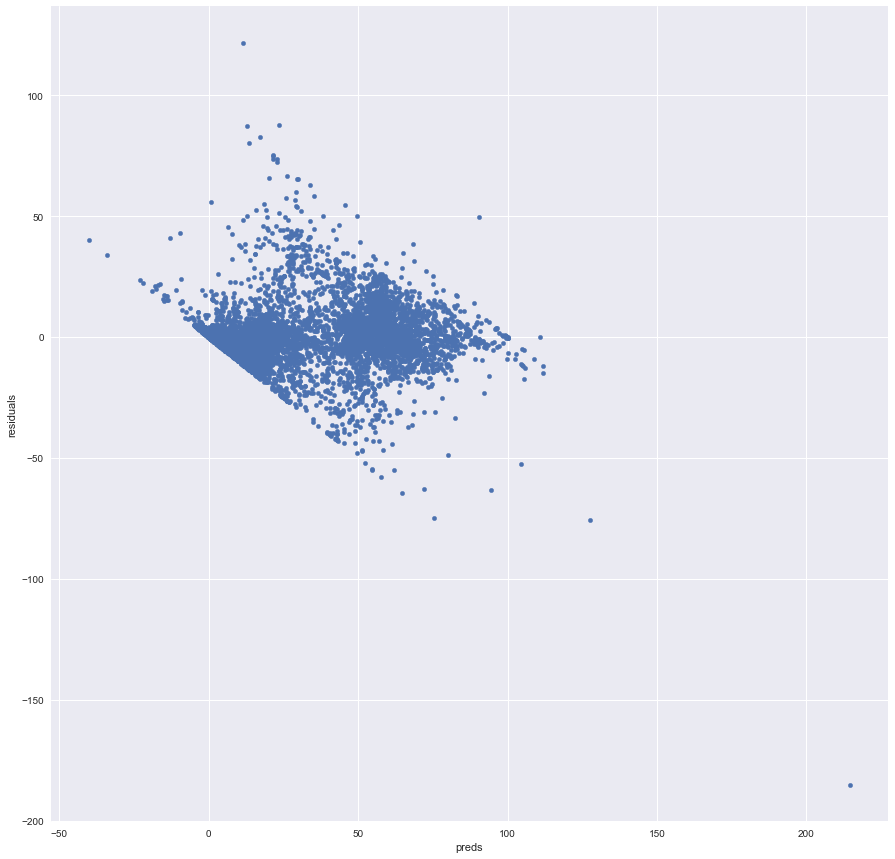

In [74]:
#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (15, 15)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train.ravel()})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

We note that the **Ridge** method iw way better than the **lasso** method**


Now that the data is ready, we will try to look at the shape of the data in a smaller dimension (equal to 2 in our case). For this, we use different dimension reduction techniques (TSNE, PCA and SVD)

In [75]:
red_tsne = TSNE(n_components=2,random_state=42).fit_transform(X_train)
red_pca = PCA(n_components=2, random_state = 42).fit_transform(X_train)
red_svd = TruncatedSVD(n_components = 2, algorithm = 'randomized', random_state = 42).fit_transform(X_train)

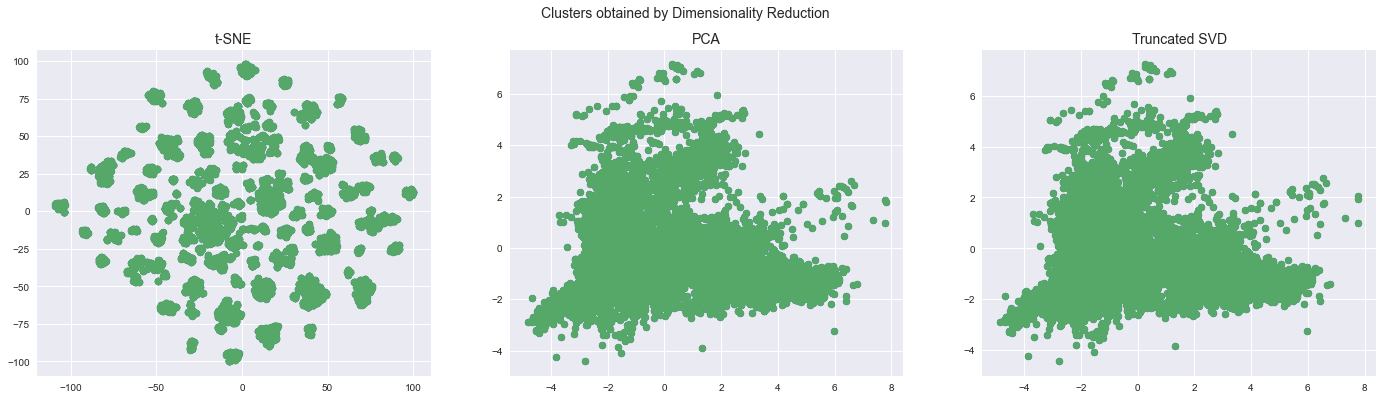

In [76]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters obtained by Dimensionality Reduction', fontsize=14)

ax1.scatter(red_tsne[:,0], red_tsne[:,1],  cmap='coolwarm')
ax1.scatter(red_tsne[:,0], red_tsne[:,1],  cmap='coolwarm')
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax2.scatter(red_pca[:,0], red_pca[:,1],  cmap='coolwarm', label='Player 1 won')
ax2.scatter(red_pca[:,0], red_pca[:,1],  cmap='coolwarm', label='Player 2 won')
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax3.scatter(red_svd[:,0], red_svd[:,1],  cmap='coolwarm', label='Player 1 won')
ax3.scatter(red_svd[:,0], red_svd[:,1],  cmap='coolwarm', label='Player 2 won')
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
plt.show()

In this step, we will use three algorithms:
  - Two linear algorithms (Linear Regression & Support Vector Regressor)
  - Two Ensemble learning  algorithms (Random Forest Regressor, Decision Tree Regressor)
  - Two Gradient Boosting algorithms (LighGBM, XGBoost)

I will know apply these models and choose the model with the lowest value of the **RMSE**. And using Regularisation

In [77]:
train_accuracies = {'Linear Regression':[0,0],  'Support Vector Regression' : [0,0] , 'Random Forest Regression':[0,0],
                    'Deision Tree Regression':[0,0] , 'XGBoost Regression':[0,0] , 'lightgbm Regressor' :[0,0] }
test_accuracies = {'Linear Regression':[0,0],  'Support Vector Regression' : [0,0] , 'Random Forest Regression':[0,0],
                    'Deision Tree Regression':[0,0] , 'XGBoost Regression':[0,0] , 'lightgbm Regressor' :[0,0] }

In [78]:
lr = LinearRegression()
lr.fit(X_train , y_train)
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)
scores1 = cross_val_score(lr, train_preds.reshape(-1, 1), y_train, scoring= 'neg_mean_squared_error', cv=5)
scores2 = cross_val_score(lr, test_preds.reshape(-1, 1), y_test, scoring= 'neg_mean_squared_error', cv=5)

In [79]:
print("Linear Regression results :")

print("   -   The Mean Squared Error on the train set : {:.7f}".format(np.sqrt(-scores1.mean())))
train_accuracies['Linear Regression'][0] = np.sqrt(-scores1.mean())
print("   -   The Mean Squared Error Deviation on the train set : {:.7f}".format(np.sqrt(scores1.std())))
train_accuracies['Linear Regression'][1] = np.sqrt(scores1.std())

print("   -   The Mean Squared Error on the test set : {:.2f}".format(np.sqrt(-scores2.mean())))
test_accuracies['Linear Regression'][0] = np.sqrt(-scores2.mean())
print("   -   The Mean Squared Error Deviation on the test set : {:.7f}".format(np.sqrt(scores2.std())))
test_accuracies['Linear Regression'][1] = np.sqrt(scores2.std())

Linear Regression results :
   -   The Mean Squared Error on the train set : 11.4478766
   -   The Mean Squared Error Deviation on the train set : 4.0962311
   -   The Mean Squared Error on the test set : 11.77
   -   The Mean Squared Error Deviation on the test set : 5.9920296


In [80]:
sv = SVR(kernel = 'rbf')
sv.fit(X_train, y_train)
train_preds = sv.predict(X_train)
test_preds = sv.predict(X_test)
scores1 = cross_val_score(sv, X = train_preds.reshape(-1, 1), y = y_train.ravel(), scoring= 'neg_mean_squared_error', cv=5)
scores2 = cross_val_score(sv, X =  test_preds.reshape(-1, 1), y = y_test.ravel(), scoring= 'neg_mean_squared_error', cv=5)

In [81]:
print("Support Vector Regression results :")

print("   -   The Mean Squared Error on the train set : {:.7f}".format(np.sqrt(-scores1.mean())))
train_accuracies['Support Vector Regression'][0] = np.sqrt(-scores1.mean())
print("   -   The Mean Squared Error Deviation on the train set : {:.7f}".format(np.sqrt(scores1.std())))
train_accuracies['Support Vector Regression'][1] = np.sqrt(scores1.std())

print("   -   The Mean Squared Error on the test set : {:.2f}".format(np.sqrt(-scores2.mean())))
test_accuracies['Support Vector Regression'][0] = np.sqrt(-scores2.mean())
print("   -   The Mean Squared Error Deviation on the test set : {:.7f}".format(np.sqrt(scores2.std())))
test_accuracies['Support Vector Regression'][1] = np.sqrt(scores2.std())

Support Vector Regression results :
   -   The Mean Squared Error on the train set : 12.4632036
   -   The Mean Squared Error Deviation on the train set : 3.4468428
   -   The Mean Squared Error on the test set : 13.57
   -   The Mean Squared Error Deviation on the test set : 7.8047435


In [82]:
dt = DecisionTreeRegressor()
dt.fit(X_train , y_train)
train_preds = dt.predict(X_train)
test_preds = dt.predict(X_test)
scores1 = cross_val_score(dt, X = train_preds.reshape(-1, 1), y = y_train.ravel(), scoring= 'neg_mean_squared_error', cv=10)
scores2 = cross_val_score(dt, X =  test_preds.reshape(-1, 1), y = y_test.ravel(), scoring= 'neg_mean_squared_error', cv=10)

In [83]:
print("Deision Tree Regression results :")

print("   -   The Mean Squared Error on the train set : {:.7f}".format(np.sqrt(-scores1.mean())))
train_accuracies['Deision Tree Regression'][0] = np.sqrt(-scores1.mean())
print("   -   The Mean Squared Error Deviation on the train set : {:.7f}".format(np.sqrt(scores1.std())))
train_accuracies['Deision Tree Regression'][1] = np.sqrt(scores1.std())

print("   -   The Mean Squared Error on the test set : {:.2f}".format(np.sqrt(-scores2.mean())))
test_accuracies['Deision Tree Regression'][0] = np.sqrt(-scores2.mean())
print("   -   The Mean Squared Error Deviation on the test set : {:.7f}".format(np.sqrt(scores2.std())))
test_accuracies['Deision Tree Regression'][1] = np.sqrt(scores2.std())

Deision Tree Regression results :
   -   The Mean Squared Error on the train set : 1.1827959
   -   The Mean Squared Error Deviation on the train set : 1.6514318
   -   The Mean Squared Error on the test set : 13.59
   -   The Mean Squared Error Deviation on the test set : 7.3390504


In [84]:
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)
scores1 = cross_val_score(rf, X = train_preds.reshape(-1, 1), y = y_train.ravel(), scoring= 'neg_mean_squared_error', cv=10)
scores2 = cross_val_score(rf, X =  test_preds.reshape(-1, 1), y = y_test.ravel(), scoring= 'neg_mean_squared_error', cv=10)

In [85]:

print("Random Forest Regression results :")

print("   -   The Mean Squared Error on the train set : {:.7f}".format(np.sqrt(-scores1.mean())))
train_accuracies['Random Forest Regression'][0] = np.sqrt(-scores1.mean())
print("   -   The Mean Squared Error Deviation on the train set : {:.7f}".format(np.sqrt(scores1.std())))
train_accuracies['Random Forest Regression'][1] = np.sqrt(scores1.std())

print("   -   The Mean Squared Error on the test set : {:.2f}".format(np.sqrt(-scores2.mean())))
test_accuracies['Random Forest Regression'][0] = np.sqrt(-scores2.mean())
print("   -   The Mean Squared Error Deviation on the test set : {:.7f}".format(np.sqrt(scores2.std())))
test_accuracies['Random Forest Regression'][1] = np.sqrt(scores2.std())

Random Forest Regression results :
   -   The Mean Squared Error on the train set : 3.6594320
   -   The Mean Squared Error Deviation on the train set : 1.8420096
   -   The Mean Squared Error on the test set : 10.40
   -   The Mean Squared Error Deviation on the test set : 6.1332185


In [86]:
gb = XGBRegressor()
gb.fit(X_train , y_train)
train_preds = gb.predict(X_train)
test_preds = gb.predict(X_test)
scores1 = cross_val_score(gb, X = train_preds.reshape(-1, 1), y = y_train.ravel(), scoring= 'neg_mean_squared_error', cv=10)
scores2 = cross_val_score(gb, X =  test_preds.reshape(-1, 1), y = y_test.ravel(), scoring= 'neg_mean_squared_error', cv=10)

In [87]:
print("XGBoost Regression results :")

print("   -   The Mean Squared Error on the train set : {:.7f}".format(np.sqrt(-scores1.mean())))
train_accuracies['XGBoost Regression'][0] = np.sqrt(-scores1.mean())
print("   -   The Mean Squared Error Deviation on the train set : {:.7f}".format(np.sqrt(scores1.std())))
train_accuracies['XGBoost Regression'][1] = np.sqrt(scores1.std())

print("   -   The Mean Squared Error on the test set : {:.2f}".format(np.sqrt(-scores2.mean())))
test_accuracies['XGBoost Regression'][0] = np.sqrt(-scores2.mean())
print("   -   The Mean Squared Error Deviation on the test set : {:.7f}".format(np.sqrt(scores2.std())))
test_accuracies['XGBoost Regression'][1] = np.sqrt(scores2.std())

XGBoost Regression results :
   -   The Mean Squared Error on the train set : 3.8170251
   -   The Mean Squared Error Deviation on the train set : 1.6386757
   -   The Mean Squared Error on the test set : 10.65
   -   The Mean Squared Error Deviation on the test set : 7.6311533


In [88]:
gbm = lgb.LGBMRegressor()
gbm.fit(X_train , y_train)
train_preds = gbm.predict(X_train)
test_preds = gbm.predict(X_test)
scores1 = cross_val_score(gbm, X = train_preds.reshape(-1, 1), y = y_train.ravel(), scoring= 'neg_mean_squared_error', cv=10)
scores2 = cross_val_score(gbm, X =  test_preds.reshape(-1, 1), y = y_test.ravel(), scoring= 'neg_mean_squared_error', cv=10)

In [89]:
print("lightgbm Regressor results :")

print("   -   The Mean Squared Error on the train set : {:.7f}".format(np.sqrt(-scores1.mean())))
train_accuracies['lightgbm Regressor'][0] = np.sqrt(-scores1.mean())
print("   -   The Mean Squared Error Deviation on the train set : {:.7f}".format(np.sqrt(scores1.std())))
train_accuracies['lightgbm Regressor'][1] = np.sqrt(scores1.std())

print("   -   The Mean Squared Error on the test set : {:.2f}".format(np.sqrt(-scores2.mean())))
test_accuracies['lightgbm Regressor'][0] = np.sqrt(-scores2.mean())
print("   -   The Mean Squared Error Deviation on the test set : {:.7f}".format(np.sqrt(scores2.std())))
test_accuracies['lightgbm Regressor'][1] = np.sqrt(scores2.std())

lightgbm Regressor results :
   -   The Mean Squared Error on the train set : 5.8582991
   -   The Mean Squared Error Deviation on the train set : 3.3929569
   -   The Mean Squared Error on the test set : 8.99
   -   The Mean Squared Error Deviation on the test set : 7.4421298


In [90]:
train_accuracies

{'Linear Regression': [11.44787659880863, 4.09623106957464],
 'Support Vector Regression': [12.463203607696318, 3.446842795650127],
 'Random Forest Regression': [3.6594319652732237, 1.8420096118127998],
 'Deision Tree Regression': [1.1827959459752868, 1.6514318144733886],
 'XGBoost Regression': [3.8170250690591137, 1.638675723299846],
 'lightgbm Regressor': [5.858299139988858, 3.392956871299327]}

In [91]:
test_accuracies

{'Linear Regression': [11.766192392758866, 5.992029554288585],
 'Support Vector Regression': [13.57345958403786, 7.80474348074958],
 'Random Forest Regression': [10.402977682016756, 6.133218517637387],
 'Deision Tree Regression': [13.58992903637209, 7.339050434840747],
 'XGBoost Regression': [10.650520723010432, 7.6311532750397255],
 'lightgbm Regressor': [8.993698443729071, 7.4421298161155445]}

In [92]:
y = list(train_accuracies.values())
train_score=[]
for  i in y :
    train_score.append(i[0])
train_dev=[]
for  i in y :
    train_dev.append(i[1])

In [93]:
y = list(test_accuracies.values())
test_score=[]
for  i in y :
    test_score.append(i[0])
test_dev=[]
for  i in y :
    test_dev.append(i[1])


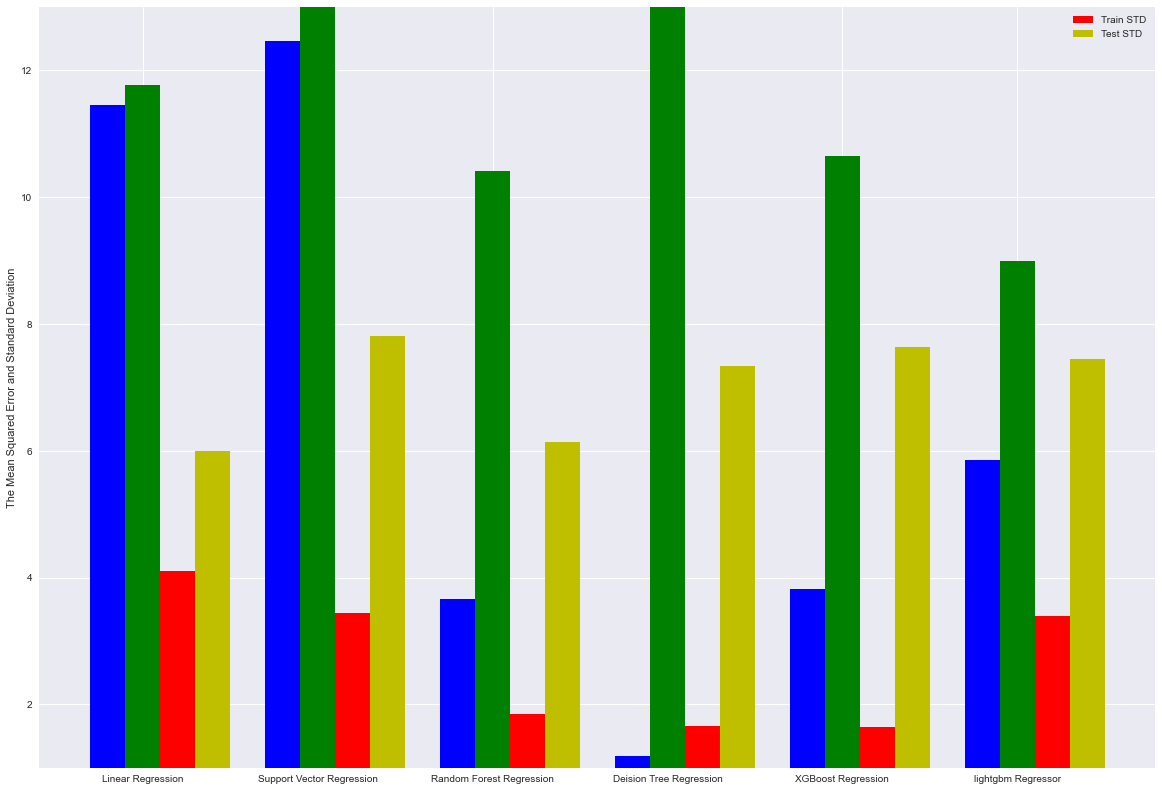

In [94]:
ind = np.arange(6)
width = 0.2

fig = plt.figure(figsize=(20,14))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, train_score, width, color='b')
rects2 = ax.bar(ind+width, test_score, width, color='g')
rects3 = ax.bar(ind+2*width, train_dev, width, color='r')
rects4 = ax.bar(ind+3*width, test_dev, width, color='y')

ax.set_ylabel('The Mean Squared Error and Standard Deviation')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Linear Regression', 'Support Vector Regression', 'Random Forest Regression','Deision Tree Regression',
                    'XGBoost Regression','lightgbm Regressor') )
ax.legend((rects1[0], rects2[0]), ('Train Mean Squared Error', 'Test Mean Squared Error'))
ax.legend((rects3[0], rects4[0]), ('Train STD', 'Test STD'))


plt.ylim((1,13))
plt.show()

As we have seen from the data visualization, the **Boosting algorithms**  are the most efficient although the data are far from being linearly separable. Moreover, **LightGBM** seems to be the most promising model in our case since it is the one that overfits less the data.

In [95]:
y_pred = gbm.predict(X_test)

In [96]:
output = pd.DataFrame({'Nutriscore_grade_Prediction': y_pred})

filename = 'Predictions.csv'

output.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Predictions.csv
